In [1]:
import os
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def SIR_derivatives(state, t, N, beta, gamma):
    S, I, R = state
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plot(S, I, R, days):

    suscpetible = S
    infected =I
    recovered = R
    days = days
    
    fig = plt.figure(facecolor='w', figsize=(12, 7))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(days, suscpetible, 'b',
             linestyle = '--', lw=2, label='Susceptible')
    ax.plot(days, infected, 'r',
             linestyle = '--', lw=2, label='Infected')
    ax.plot(days, recovered, 'g',
            linestyle = '--', lw=2, label='Recovered')

    ax.set_xlabel('Days')
    ax.set_ylabel('Students')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)

    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.savefig('SIR.pdf')
    plt.savefig('SIR.png')
    plt.show()

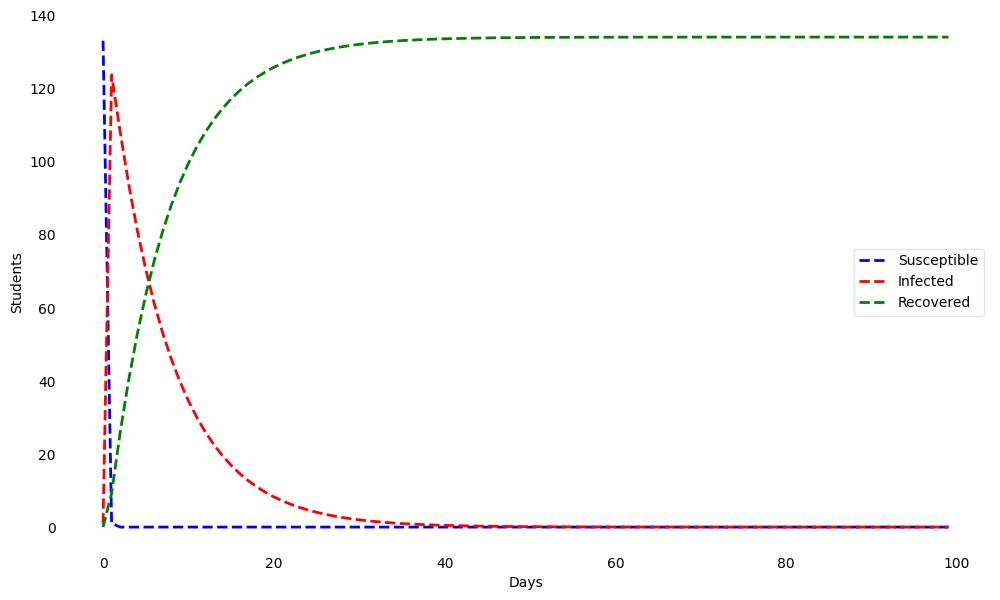

In [4]:
population = 134
recovered = 0
infected = 1
susceptible = population - infected - recovered
days_to_recover = 7
infection_rate = 0.075

transition_rate = susceptible * infection_rate
recovery_rate = 1/days_to_recover

days = range(0, 100)

diff = odeint(SIR_derivatives,[susceptible, infected, recovered],days, args=(population, transition_rate, recovery_rate))

S, I, R = diff.T

df = pd.DataFrame({'Susceptible': S,'Infected': I,'Recovered': R})

plot(S, I, R, days)

In [5]:
df.head(50)

,Susceptible,Infected,Recovered
0,1.330000e+02,1.000000,0.000000
1,1.076209e+00,123.679749,9.244042
2,1.891782e-04,108.162870,25.836941
3,1.044946e-07,93.764168,40.235832
4,5.023196e-09,81.282085,52.717915
5,-3.094139e-11,70.461645,63.538355
6,-7.431459e-11,61.081642,72.918358
7,-9.759415e-09,52.950325,81.049675
8,-1.081411e-09,45.901467,88.098533
9,1.385432e-10,39.790967,94.209033
